In [1]:
!curl https://download.mosek.com/stable/8.1.0.82/mosektoolslinux64x86.tar.bz2 --output /root/mosektoolslinux64x86.tar.bz2
!cd /root/; tar xvf /root/mosektoolslinux64x86.tar.bz2
from google.colab import drive
drive.mount('/content/gdrive')
!cp -avr /content/gdrive/My\ Drive/Mosek/mosek.lic /root/mosek/
!pip install git+https://github.com/convexengineering/gpkit
!pip show gpkit

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40.3M  100 40.3M    0     0  95.1M      0 --:--:-- --:--:-- --:--:-- 95.0M
mosek/8/tools/examples/python/parameters.py
mosek/8/toolbox/examples/cqo1.m
mosek/8/toolbox/r2014a/mskqpopt.m
mosek/8/tools/examples/fusion/java/breaksolver.java
mosek/8/toolbox/r2014a/mskcheck.m
mosek/8/tools/examples/fusion/cxx/lo1.cc
mosek/8/tools/examples/data/dgo.f
mosek/8/tools/examples/dotnet/scopt1.cs
mosek/8/tools/examples/dotnet/solvebasis.cs
mosek/8/toolbox/r2014aom/mskerrmsg.m
mosek/8/toolbox/examples/simple.m
mosek/8/tools/examples/java/solutionquality.java
mosek/8/tools/examples/fusion/dotnet/production.cs
mosek/8/tools/examples/fusion/java/Makefile
mosek/8/tools/examples/fusion/python/lo1.py
mosek/8/tools/examples/fusion/java/duality.java
mosek/8/tools/platform/linux64x86/bin/libcilkrts.so.5
mosek/8/toolbox/examples/qo2.m
mosek/8/tools/ex

In [2]:
from pylab import *
from gpkit import VectorVariable, Variable, Model, units

.

Found no installed solvers, beginning a build.
# Building GPkit version 1.1
# Moving to the directory from which GPkit was imported.

Attempting to find and build solvers:

# Looking for `mosek_cli`
#   (A "success" is if mskexpopt complains that
#    we haven't specified a file for it to open.)
#     Calling 'mskexpopt'
##
### CALL BEGINS
### CALL ENDS
##
# Looks like `mskexpopt` was not found in the default PATH,
#  so let's try locating that binary ourselves.
#   Adding /root/mosek/8/tools/platform/linux64x86/bin to the PATH
#     Calling 'mskexpopt'
##
### CALL BEGINS
### CALL ENDS
##

Found mosek_cli in /root/mosek/8/tools/platform/linux64x86/bin

# Looking for `mosek_conif`
#   Trying to import mosek...
# Did not find
# mosek_conif

# Looking for `cvxopt`
#   Trying to import cvxopt...

Found cvxopt in the default PYTHONPATH

Found the following solvers: mosek_cli, cvxopt
#     Replacing directory env


.........................E...................................................................................................................................../usr/local/lib/python3.11/dist-packages/gpkit/constraints/sgp.py:177: UserWarning: SGP not convergent: Cost rose by 0.0099% (9.99901e-31 to 1e-30) on GP solve 2. Details can be found in `m.program.results` or by solving at a higher verbosity. Note convergence is not guaranteed for models with SignomialEqualities.
  pywarnings.warn(
.................................................
ERROR: test_vector_sweep (gpkit.tests.t_sub.TestModelSubs.test_vector_sweep)
Test sweep involving VectorVariables
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gpkit/tests/t_sub.py", line 205, in test_vector_sweep
    sol = m.solve(verbosity=0)
          ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gpkit/constraints/prog_fa


GPkit is now installed with solver(s) ['mosek_cli', 'cvxopt']
To incorporate new solvers at a later date, run `gpkit.build()`.

If any tests didn't pass, please post the output above
(starting from "Found no installed solvers, beginning a build.")
to gpkit@mit.edu or https://github.com/convexengineering/gpkit/issues/new
so we can prevent others from having these errors.

The same goes for any other bugs you encounter with GPkit:
send 'em our way, along with any interesting models, speculative features,
comments, discussions, or clarifications you feel like sharing.

Finally, we hope you find our documentation (https://gpkit.readthedocs.io/)
and engineering-design models (https://github.com/convexengineering/gplibrary/)
to be useful resources for your own applications.

Enjoy!



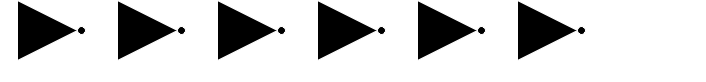

# Solution (q1)
this one is basically the solution to the assignment (q1)

In [3]:
# Number of gates
N = 6

# Vector of gate sizes
gate_sizes = VectorVariable(N, "gs")

# we want to setup a variable that is going to limit the total path delay.
# by minimizing this variable, we are inherently minimizing the path delay.
my_T = Variable("my_T")

# we assume that the logical and parasitic efforts are ideal, as per the problem
# statement, for all inverters in the chain.
g = [1] * N
p = [1] * N

# capacitance that the path needs to drive (in C)
c_load = 100

# intrinsic delay of the inverter
tau = 5

# largest gate that is available to us
gate_size_max = 64

# constraints for the solver
constraints = []
constraints.append(my_T >=
                    (g[1] * gate_sizes[1] / gate_sizes[0]) + p[0] + \
                    (g[2] * gate_sizes[2] / gate_sizes[1]) + p[1] + \
                    (g[3] * gate_sizes[3] / gate_sizes[2]) + p[2] + \
                    (g[4] * gate_sizes[4] / gate_sizes[3]) + p[3] + \
                    (g[5] * gate_sizes[5] / gate_sizes[4]) + p[4] + \
                    (c_load / gate_sizes[5]) + p[5])

# additional constraint for the first gate to be minimum-sized, since we don't
# know what is the max allowed size for the first gate, depending on it's driver
constraints.append(gate_sizes[0] == 1)

# minimum and maximum gate size constraint for all gates
constraints.extend([gate_sizes[i] >= 1 for i in range(N)])
constraints.extend([gate_sizes[i] <= gate_size_max for i in range(N)])

# define the problem
model = Model(my_T, constraints)
solution = model.solve(verbosity = 1)

# extract the results
T_wall = solution['variables']['my_T']
gate_sizes = solution['variables']['gs']

# print the results
print(f'T_wall = {round(T_wall, 2)}')
print(f'T_wall (ps) = {round(T_wall * tau, 2)}')
print(f'Gate Sizes: {list(gate_sizes)}')

Using solver 'mosek_cli'
 for 7 free variables
  in 16 posynomial inequalities.
Solving took 0.0184 seconds.
T_wall = 18.93
T_wall (ps) = 94.63
Gate Sizes: [1.0, 2.154434766877665, 4.641590093049144, 9.999999070059587, 21.54433704754415, 46.41589661408925]


# Solution (q2)
this is the solution to the q2 in my assignment

In [4]:
# Number of gates
N = 6

# Vector of gate sizes
gate_sizes = VectorVariable(N, "gs")

# we want to setup a variable that is going to limit the total path delay.
# by minimizing this variable, we are inherently minimizing the path delay.
my_T = Variable("my_T")

# we assume that the logical and parasitic efforts are ideal, as per the problem
# statement, for all inverters in the chain.
g = [1] * N
p = [1] * N

# capacitance that the path needs to drive (in C)
c_load = 100

# intrinsic delay of the inverter
tau = 5

# largest gate that is available to us
gate_size_max = 64

# timing specification -- this needs the T_wall obtained from the prev soln
t_spec = 1.2 * T_wall

# constraints for the solver
constraints = []
constraints.append(my_T >=
                    (g[1] * gate_sizes[1] / gate_sizes[0]) + p[0] + \
                    (g[2] * gate_sizes[2] / gate_sizes[1]) + p[1] + \
                    (g[3] * gate_sizes[3] / gate_sizes[2]) + p[2] + \
                    (g[4] * gate_sizes[4] / gate_sizes[3]) + p[3] + \
                    (g[5] * gate_sizes[5] / gate_sizes[4]) + p[4] + \
                    (c_load / gate_sizes[5]) + p[5])

# additional constraint for the first gate to be minimum-sized, since we don't
# know what is the max allowed size for the first gate, depending on it's driver
constraints.append(gate_sizes[0] == 1)

# constraint for my_T to be below the t_spec
constraints.append(my_T <= t_spec)

# minimum and maximum gate size constraint for all gates
constraints.extend([gate_sizes[i] >= 1 for i in range(N)])
constraints.extend([gate_sizes[i] <= gate_size_max for i in range(N)])

# define the problem
model = Model(np.sum(gate_sizes), constraints)
solution = model.solve(verbosity = 1)

# extract the results
T_arrival = solution['variables']['my_T']
gate_sizes = solution['variables']['gs']

# print the results
print(f'T_arrival = {round(T_arrival, 2)}')
print(f'T_arrival (ps) = {round(T_arrival * tau, 2)}')
print(f'Gate Sizes: {list(gate_sizes)}')

Using solver 'mosek_cli'
 for 7 free variables
  in 17 posynomial inequalities.
Solving took 0.0355 seconds.
T_arrival = 22.71
T_arrival (ps) = 113.56
Gate Sizes: [1.0, 1.0000002782850388, 1.1965547670131111, 1.869974136458512, 3.992701222650838, 13.404547298167696]


# Varying T_spec

Experiments to understand how varying T_spec can affect gate sizes.
The path is simply a chain of 6 inverters driving a 100x load.

In [5]:
print(T_wall)

18.926612491494232


In [6]:
# a highly customized solver to just allow a single param - the ratio of tspec
# to t_wall. do not expect this particular function to work for anything else
# other than a chain of 6 inverters driving a 100x cap load where tau = 5ps
def custom_solver(tspec_factor):
  N = 6
  gate_sizes = VectorVariable(N, "gs")
  my_T = Variable("my_T")
  g = [1] * N
  p = [1] * N
  c_load = 100
  tau = 5
  gate_size_max = 64
  t_spec = tspec_factor * T_wall

  # constraints for the solver
  constraints = []
  constraints.append(my_T >=
                      (g[1] * gate_sizes[1] / gate_sizes[0]) + p[0] + \
                      (g[2] * gate_sizes[2] / gate_sizes[1]) + p[1] + \
                      (g[3] * gate_sizes[3] / gate_sizes[2]) + p[2] + \
                      (g[4] * gate_sizes[4] / gate_sizes[3]) + p[3] + \
                      (g[5] * gate_sizes[5] / gate_sizes[4]) + p[4] + \
                      (c_load / gate_sizes[5]) + p[5])

  # additional constraint for the first gate to be minimum-sized, since we don't
  # know what is the max allowed size for the first gate, depending on it's driver
  constraints.append(gate_sizes[0] == 1)

  # constraint for my_T to be below the t_spec
  constraints.append(my_T <= t_spec)

  # minimum and maximum gate size constraint for all gates
  constraints.extend([gate_sizes[i] >= 1 for i in range(N)])
  constraints.extend([gate_sizes[i] <= gate_size_max for i in range(N)])

  # define the problem
  model = Model(np.sum(gate_sizes), constraints)
  solution = model.solve(verbosity = 1)

  # extract the results
  T_arrival = solution['variables']['my_T']
  gate_sizes = solution['variables']['gs']

  return (T_arrival, gate_sizes), solution

Solving for t_spec = 1.0
Using solver 'mosek_cli'
 for 7 free variables
  in 17 posynomial inequalities.
Solving took 0.0171 seconds.
Solution check warning: Dual: sum of nu^T * A did not vanish.
Solving for t_spec = 1.1
Using solver 'mosek_cli'
 for 7 free variables
  in 17 posynomial inequalities.
Solving took 0.0165 seconds.
Solving for t_spec = 1.2
Using solver 'mosek_cli'
 for 7 free variables
  in 17 posynomial inequalities.
Solving took 0.0166 seconds.
Solving for t_spec = 1.3
Using solver 'mosek_cli'
 for 7 free variables
  in 17 posynomial inequalities.
Solving took 0.0166 seconds.
Solving for t_spec = 1.4
Using solver 'mosek_cli'
 for 7 free variables
  in 17 posynomial inequalities.
Solving took 0.0164 seconds.
Solving for t_spec = 1.5
Using solver 'mosek_cli'
 for 7 free variables
  in 17 posynomial inequalities.
Solving took 0.0165 seconds.
Solving for t_spec = 1.6
Using solver 'mosek_cli'
 for 7 free variables
  in 17 posynomial inequalities.
Solving took 0.017 seconds.
S

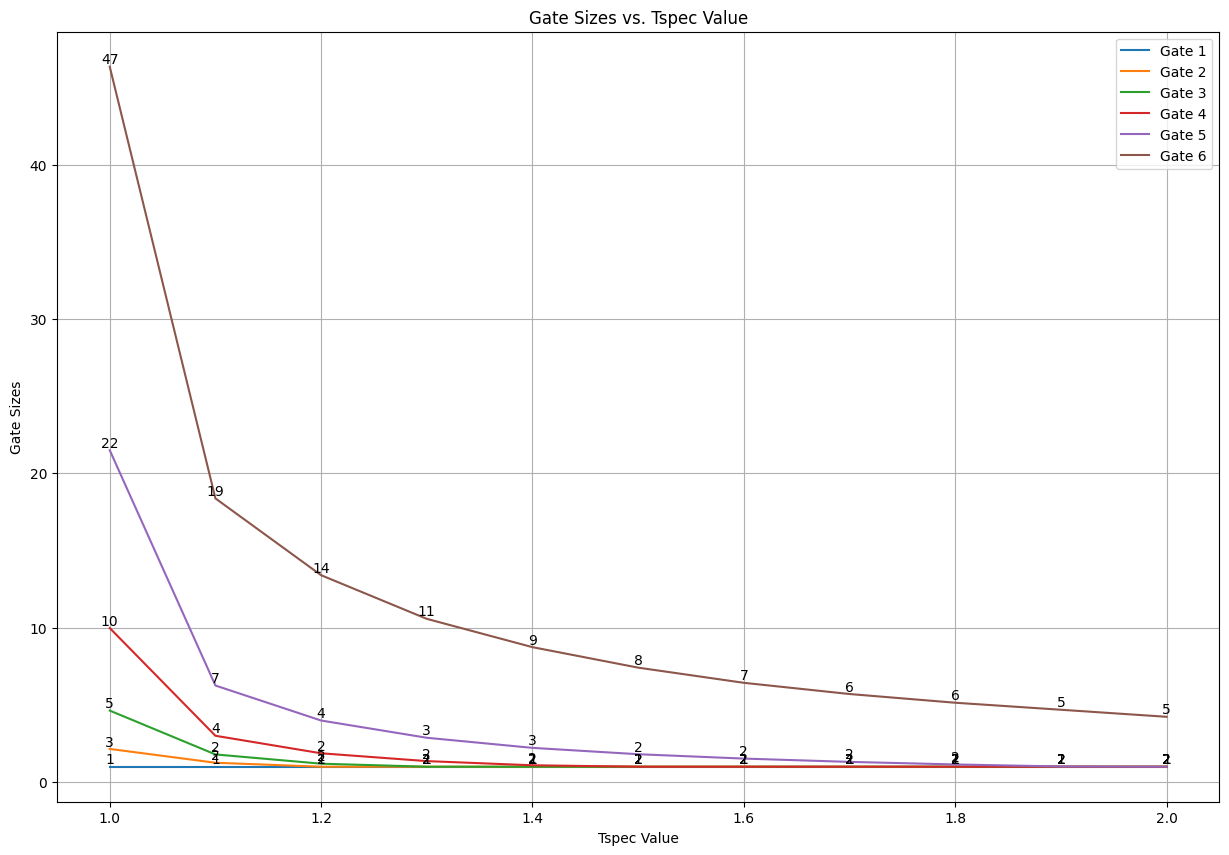

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
# range() can't be used with float -,-
desired_tspec_values = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
# list to capture t_arrival
t_arrival_values = []
# list to capture gate_sizes
gate_sizes_values = []
for tspec in desired_tspec_values:
  print(f'Solving for t_spec = {tspec}')
  (t_arrival, gate_sizes), _ = custom_solver(tspec)
  t_arrival_values.append(t_arrival)
  gate_sizes_values.append(gate_sizes)
  # plt.plot(np.array(desired_tspec_values), gate_sizes)

# Create the plot
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i in range(6):  # Iterate through each gate
    gate_sizes_for_gate_i = [gate_sizes[i] for gate_sizes in gate_sizes_values]
    plt.plot(desired_tspec_values, gate_sizes_for_gate_i, label=f'Gate {i+1}')

# Customize the plot
plt.xlabel('Tspec Value')
plt.ylabel('Gate Sizes')
plt.title('Gate Sizes vs. Tspec Value')
plt.legend()
plt.grid(True)

# Add data labels
for i in range(6):
    gate_sizes_for_gate_i = [gate_sizes[i] for gate_sizes in gate_sizes_values]
    for x, y in zip(desired_tspec_values, gate_sizes_for_gate_i):
        label = int(math.ceil(y))  # Round to nearest integer
        plt.text(x, y, label, ha='center', va='bottom')  # Adjust alignment as needed

# Show the plot
plt.show()

Experimenting with a different circuit (load is 10x not 100x)

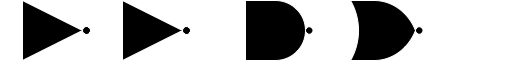

In [12]:
# Number of gates
N = 4

# Vector of gate sizes
gate_sizes = VectorVariable(N, "gs")

# we want to setup a variable that is going to limit the total path delay.
# by minimizing this variable, we are inherently minimizing the path delay.
my_T = Variable("my_T")

# we assume that the logical and parasitic efforts are ideal, as per the problem
# statement, for all inverters in the chain.
g = [1, 1, 4/3, 5/3]
p = [1, 1, 2, 2]

# capacitance that the path needs to drive (in C)
c_load = 10

# intrinsic delay of the inverter
tau = 5

# largest gate that is available to us
gate_size_max = 64

# constraints for the solver
constraints = []
constraints.append(my_T >=
                    (g[1] * gate_sizes[1] / gate_sizes[0]) + p[0] + \
                    (g[2] * gate_sizes[2] / gate_sizes[1]) + p[1] + \
                    (g[3] * gate_sizes[3] / gate_sizes[2]) + p[2] + \
                    (c_load / gate_sizes[3]) + p[3])

# additional constraint for the first gate to be minimum-sized, since we don't
# know what is the max allowed size for the first gate, depending on it's driver
constraints.append(gate_sizes[0] == 1)

# minimum and maximum gate size constraint for all gates
constraints.extend([gate_sizes[i] >= 1 for i in range(N)])
constraints.extend([gate_sizes[i] <= gate_size_max for i in range(N)])

# define the problem
model = Model(my_T, constraints)
solution = model.solve(verbosity = 1)

# extract the results
T_wall = solution['variables']['my_T']
gate_sizes = solution['variables']['gs']

# print the results
print(f'T_wall = {round(T_wall, 2)}')
print(f'T_wall (ps) = {round(T_wall * tau, 2)}')
print(f'Gate Sizes: {list(gate_sizes)}')

Using solver 'mosek_cli'
 for 5 free variables
  in 12 posynomial inequalities.
Solving took 0.0182 seconds.
T_wall = 14.68
T_wall (ps) = 73.42
Gate Sizes: [1.0, 2.1711852139645544, 3.5355327669460794, 4.60577983202075]


In [13]:
# a highly customized solver to just allow a single param - the ratio of tspec
# to t_wall. do not expect this particular function to work for anything else
# other than the schematic shown above.
def custom_solver(tspec_factor):
  N = 4
  gate_sizes = VectorVariable(N, "gs")
  my_T = Variable("my_T")
  g = [1, 1, 4/3, 5/3]
  p = [1, 1, 2, 2]
  c_load = 10
  tau = 5
  gate_size_max = 64
  t_spec = tspec_factor * T_wall

  # constraints for the solver
  constraints = []
  constraints.append(my_T >=
                    (g[1] * gate_sizes[1] / gate_sizes[0]) + p[0] + \
                    (g[2] * gate_sizes[2] / gate_sizes[1]) + p[1] + \
                    (c_load / gate_sizes[3]) + p[3])

  # additional constraint for the first gate to be minimum-sized, since we don't
  # know what is the max allowed size for the first gate, depending on it's driver
  constraints.append(gate_sizes[0] == 1)

  # constraint for my_T to be below the t_spec
  constraints.append(my_T <= t_spec)

  # minimum and maximum gate size constraint for all gates
  constraints.extend([gate_sizes[i] >= 1 for i in range(N)])
  constraints.extend([gate_sizes[i] <= gate_size_max for i in range(N)])

  # define the problem
  model = Model(np.sum(gate_sizes), constraints)
  solution = model.solve(verbosity = 1)

  # extract the results
  T_arrival = solution['variables']['my_T']
  gate_sizes = solution['variables']['gs']

  return (T_arrival, gate_sizes), solution

Solving for t_spec = 1.0
Using solver 'mosek_cli'
 for 5 free variables
  in 13 posynomial inequalities.
Solving took 0.0193 seconds.
Solving for t_spec = 1.1
Using solver 'mosek_cli'
 for 5 free variables
  in 13 posynomial inequalities.
Solving took 0.0159 seconds.
Solving for t_spec = 1.2
Using solver 'mosek_cli'
 for 5 free variables
  in 13 posynomial inequalities.
Solving took 0.0177 seconds.
Solving for t_spec = 1.3
Using solver 'mosek_cli'
 for 5 free variables
  in 13 posynomial inequalities.
Solving took 0.0163 seconds.
Solving for t_spec = 1.4
Using solver 'mosek_cli'
 for 5 free variables
  in 13 posynomial inequalities.
Solving took 0.0202 seconds.
Solving for t_spec = 1.5
Using solver 'mosek_cli'
 for 5 free variables
  in 13 posynomial inequalities.
Solving took 0.0163 seconds.
Solving for t_spec = 1.6
Using solver 'mosek_cli'
 for 5 free variables
  in 13 posynomial inequalities.
Solving took 0.016 seconds.
Solving for t_spec = 1.7
Using solver 'mosek_cli'
 for 5 free v

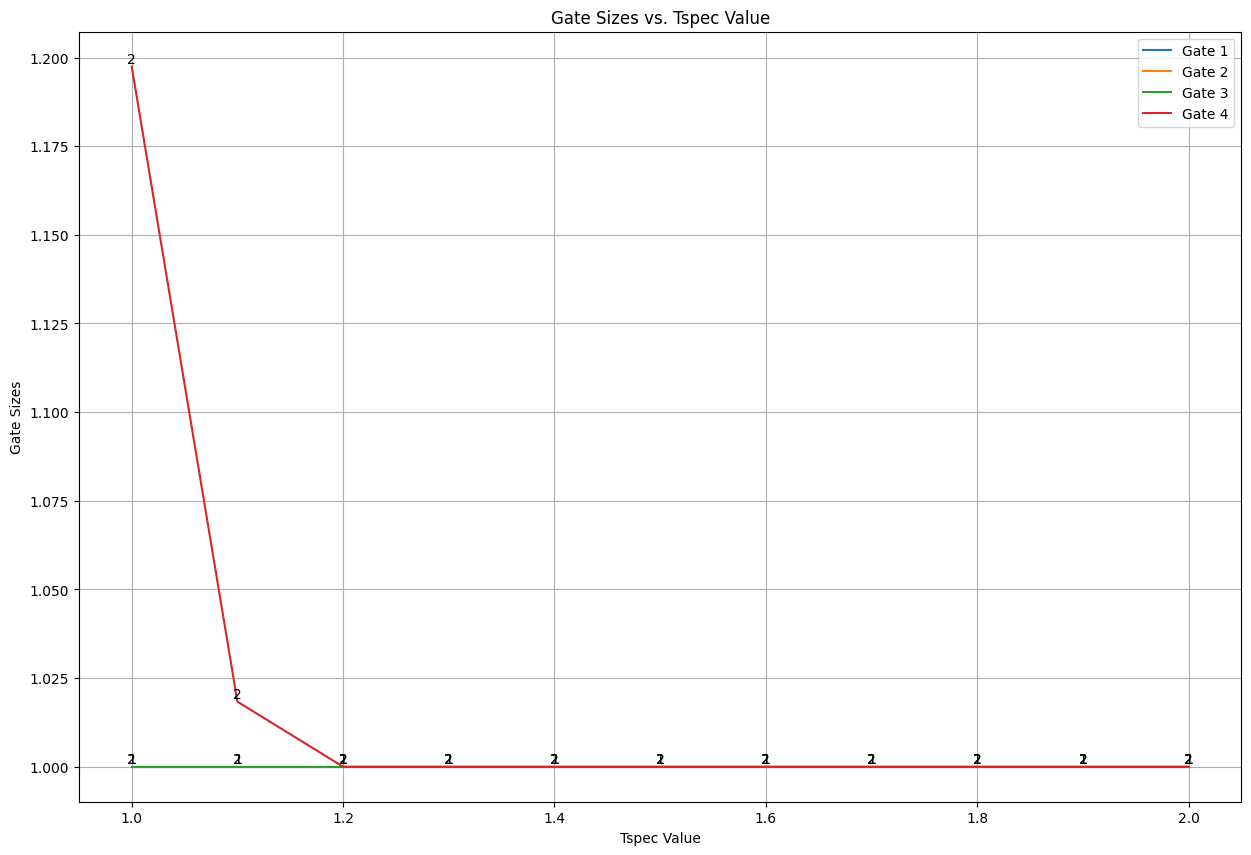

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
# range() can't be used with float -,-
desired_tspec_values = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
# list to capture t_arrival
t_arrival_values = []
# list to capture gate_sizes
gate_sizes_values = []
for tspec in desired_tspec_values:
  print(f'Solving for t_spec = {tspec}')
  (t_arrival, gate_sizes), _ = custom_solver(tspec)
  t_arrival_values.append(t_arrival)
  gate_sizes_values.append(gate_sizes)
  # plt.plot(np.array(desired_tspec_values), gate_sizes)

# Create the plot
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i in range(4):  # Iterate through each gate
    gate_sizes_for_gate_i = [gate_sizes[i] for gate_sizes in gate_sizes_values]
    plt.plot(desired_tspec_values, gate_sizes_for_gate_i, label=f'Gate {i+1}')

# Customize the plot
plt.xlabel('Tspec Value')
plt.ylabel('Gate Sizes')
plt.title('Gate Sizes vs. Tspec Value')
plt.legend()
plt.grid(True)

# Add data labels
for i in range(4):
    gate_sizes_for_gate_i = [gate_sizes[i] for gate_sizes in gate_sizes_values]
    for x, y in zip(desired_tspec_values, gate_sizes_for_gate_i):
        label = int(math.ceil(y))  # Round to nearest integer
        plt.text(x, y, label, ha='center', va='bottom')  # Adjust alignment as needed

# Show the plot
plt.show()

now we add a branch to the same schematic

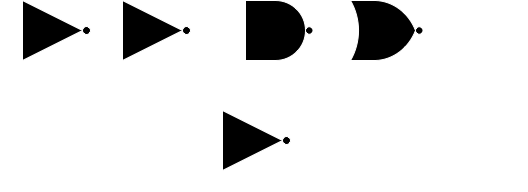

In [18]:
# Number of gates
N1 = 4
N2 = 3
Nc = 2

# Vector of gate sizes
gate_sizes = VectorVariable(N1+N2-Nc, "gs")

# we want to setup a variable that is going to limit the total path delay.
# by minimizing this variable, we are inherently minimizing the path delay.
my_T1 = Variable("my_T1")
my_T2 = Variable("my_T2")

# we assume that the logical and parasitic efforts are ideal, as per the problem
# statement, for all inverters in the chain.
g1 = [1, 1, 4/3, 5/3]
p1 = [1, 1, 2, 2]

g2 = [1, 1, 1]
p2 = [1, 1, 1]

# capacitance that the path needs to drive (in C)
c_load1 = 10
c_load2 = 4

# intrinsic delay of the inverter
tau = 5

# largest gate that is available to us
gate_size_max = 64

# constraints for the solver
constraints = []
constraints.append(my_T1 >=
                    (g1[1] * gate_sizes[1] / gate_sizes[0]) + p1[0] + \
                    (g1[2] * gate_sizes[2] / gate_sizes[1]) + p1[1] + \
                    (g1[3] * gate_sizes[3] / gate_sizes[2]) + p1[2] + \
                    (c_load1 / gate_sizes[3]) + p1[3])
constraints.append(my_T2 >=
                    (g1[1] * gate_sizes[1] / gate_sizes[0]) + p1[0] + \
                    (g1[2] * gate_sizes[2] / gate_sizes[1]) + p1[1] + \
                    (g1[3] * gate_sizes[3] / gate_sizes[2]) + p1[2] + \
                    (c_load1 / gate_sizes[3]) + p1[3])
constraints.append(my_T1 >=
                    (g2[1] * gate_sizes[1] / gate_sizes[0]) + p2[0] + \
                    (g2[2] * gate_sizes[2] / gate_sizes[1]) + p2[1] + \
                    (c_load2 / gate_sizes[2] + p2[2])
                   )
constraints.append(my_T2 >=
                    (g2[1] * gate_sizes[1] / gate_sizes[0]) + p2[0] + \
                    (g2[2] * gate_sizes[2] / gate_sizes[1]) + p2[1] + \
                    (c_load2 / gate_sizes[2] + p2[2])
                   )

# additional constraint for the first gate to be minimum-sized, since we don't
# know what is the max allowed size for the first gate, depending on it's driver
constraints.append(gate_sizes[0] == 1)

# minimum and maximum gate size constraint for all gates
constraints.extend([gate_sizes[i] >= 1 for i in range(N)])
constraints.extend([gate_sizes[i] <= gate_size_max for i in range(N)])

# define the problem
model = Model(my_T1, constraints)
solution = model.solve(verbosity = 1)

# extract the results
T_wall = solution['variables']['my_T']
gate_sizes = solution['variables']['gs']

# print the results
print(f'T_wall = {round(T_wall, 2)}')
print(f'T_wall (ps) = {round(T_wall * tau, 2)}')
print(f'Gate Sizes: {list(gate_sizes)}')

UnboundedGP: my_T2 has no upper bound.